In [18]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [19]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [20]:
x_train.shape

(25000, 500)

In [21]:
y_test.shape

(25000,)

In [22]:
y_train.shape

(25000,)

In [23]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [25]:
y_test_one_hot.shape

(25000, 2)

In [26]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [28]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
# # of parameters = 8320 = (32*32+32*32+32)*4
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 328,386
Trainable params: 328,386
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
checkpoint_filepath = './temp/checkpoint_lstm_en'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [30]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')

In [31]:
history=model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.1, callbacks=[es, mc])

Epoch 1/20
176/176 [==============================] - 34s 185ms/step - loss: 0.5210 - accuracy: 0.7632 - val_loss: 0.3543 - val_accuracy: 0.8644
Epoch 2/20
176/176 [==============================] - 32s 180ms/step - loss: 0.2951 - accuracy: 0.8873 - val_loss: 0.5648 - val_accuracy: 0.7936
Epoch 3/20
176/176 [==============================] - 32s 185ms/step - loss: 0.2361 - accuracy: 0.9108 - val_loss: 0.3065 - val_accuracy: 0.8872
Epoch 4/20
176/176 [==============================] - 33s 187ms/step - loss: 0.2034 - accuracy: 0.9258 - val_loss: 0.3187 - val_accuracy: 0.8812
Epoch 5/20
176/176 [==============================] - 34s 194ms/step - loss: 0.1808 - accuracy: 0.9356 - val_loss: 0.3396 - val_accuracy: 0.8612
Epoch 6/20
176/176 [==============================] - 34s 192ms/step - loss: 0.1606 - accuracy: 0.9411 - val_loss: 0.3076 - val_accuracy: 0.8856
Epoch 6: early stopping


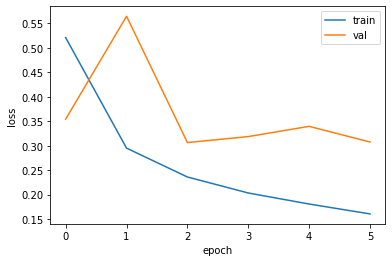

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [33]:
model.load_weights(checkpoint_filepath)

In [34]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 25s 32ms/step - loss: 0.3272 - accuracy: 0.8737


In [35]:
print('test_acc:', test_acc)

test_acc: 0.8737199902534485
